# Project 4 Youtube Trend Videos

## Index

1. [Questions to answer](#Possible-Questions-to-answer-using-this-dataset.)


2. [Code](#Code)

    2.1 [Imports](#import)
    
    2.2 [Dictionaries for Categories](#catdicts)
    
    2.3 [Cleaning tables dropping repeated videos](#clean)
    
    2.4 [Views, Likes, Dislikes and Comments per Category](#views)
    
    2.5 [Number of days a certain video trends](#days)
    
    2.6 [Dates formatting and differences](#dates)
    
    2.7 [Medians](#mode)
    
    2.8 [Average of comments per category](#comavg)
    
    2.9 [Saving tables](#save)
    
    
3. [Graphs and Plots](#Graphs-and-plots)
    
    3.1 [Views per Category and Country](#vpcc)
    
    3.2 [Likes per Category and Country](#lpcc)
    
    3.3 [Comments per Category and Country](#cpcc)
    
    3.4 [Average of comments per category and country](#acpcc)
    
    3.5 [Median of days from publish til trend](#mdpt)
    
    3.6 [Correlation Matrix](#mtx)

##### Possible Questions to answer using this dataset.
- Categories of different YouTube videos based on their comments and statistics.
- Which categories get more comments, likes and views? Which categories get less? Per country.
- Which categories have more trending videos? Which ones have less?
- Is there a correlation between video categories and season or month of publication/date of trend? It could be interesting to find patterns of video success depending on category and publication date, for example to predict in which date it is better to publish a music video.
- How much time does normally a video take since it is published until it trends? Is this related to its category? Can we make predictions?
- Which kind of video titles trend more, longer or shorter ones?
- Is there a relation between tags of a video and its trending? Do videos with more tags trend more?
- Does comment deactivation and/or rating deactivation make an influence in trendings?
- How many likes and views have trending videos in each country? Which countries have more likes and views in their trends?
- How many comments have trending videos in average?

Youtube trending explained: https://support.google.com/youtube/answer/7239739?hl=en

Data source: https://www.kaggle.com/datasnaek/youtube-new

##### About how data is displayed
- Publish time: Year, month, day, hours, minutes, seconds.
- Trending Date: Year, day, month.
- Categories and their IDs: '1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'
- video_error_or_removed == True; means the video is not available for several reasons.

## Code

In [2]:
import statistics as stats
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a name="import"></a>

In [3]:
# Import csv tables by country. USA, RU (Russia), MX (Mexico), KR (South Korea), JP (Japan), IN (India), GB (Great Britain), FR (France), DE (Germany) & CA (Canada).
usa_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\USvideos.csv",encoding='latin1')
mx_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\MXvideos.csv",encoding='latin1')
ru_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\RUvideos.csv",encoding='latin1')
jp_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\JPvideos.csv",encoding='latin1')
kr_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\KRvideos.csv",encoding='latin1')
in_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\INvideos.csv")
gb_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\GBvideos.csv")
fr_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\FRvideos.csv")
de_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\DEvideos.csv")
ca_videos = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\CAvideos.csv")

In [4]:
# Import category_id.json files for each country.
usa_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\US_category_id.json")
mx_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\RU_category_id.json")
ru_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\MX_category_id.json")
jp_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\KR_category_id.json")
kr_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\JP_category_id.json")
in_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\IN_category_id.json")
gb_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\GB_category_id.json")
fr_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\FR_category_id.json")
de_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\DE_category_id.json")
ca_cat = pd.read_json(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\archive\CA_category_id.json")

<a name="catdicts"></a>

In [5]:
# Create dicts for every country with category ids as keys, and category names as values.
usa_cat_ids = {}
for i in range(0,31):
    cat_id = usa_cat["items"][i]['id']
    cat_name = usa_cat["items"][i]['snippet']['title']
    usa_cat_ids[cat_id] = cat_name
usa_cat_ids

# For Mexico
mx_cat_ids = {}
for i in range(0,31):
    cat_id = mx_cat["items"][i]['id']
    cat_name = mx_cat["items"][i]['snippet']['title']
    mx_cat_ids[cat_id] = cat_name
mx_cat_ids

# For Russia
ru_cat_ids = {}
for i in range(0,31):
    cat_id = ru_cat["items"][i]['id']
    cat_name = ru_cat["items"][i]['snippet']['title']
    ru_cat_ids[cat_id] = cat_name
ru_cat_ids

# For Japan
jp_cat_ids = {}
for i in range(0,31):
    cat_id = jp_cat["items"][i]['id']
    cat_name = jp_cat["items"][i]['snippet']['title']
    jp_cat_ids[cat_id] = cat_name
jp_cat_ids

# For SouthKorea
kr_cat_ids = {}
for i in range(0,31):
    cat_id = kr_cat["items"][i]['id']
    cat_name = kr_cat["items"][i]['snippet']['title']
    kr_cat_ids[cat_id] = cat_name
kr_cat_ids

# For India
in_cat_ids = {}
for i in range(0,31):
    cat_id = in_cat["items"][i]['id']
    cat_name = in_cat["items"][i]['snippet']['title']
    in_cat_ids[cat_id] = cat_name
in_cat_ids

# For Great Britain
gb_cat_ids = {}
for i in range(0,31):
    cat_id = gb_cat["items"][i]['id']
    cat_name = gb_cat["items"][i]['snippet']['title']
    gb_cat_ids[cat_id] = cat_name
gb_cat_ids

# For Great Britain
fr_cat_ids = {}
for i in range(0,31):
    cat_id = fr_cat["items"][i]['id']
    cat_name = fr_cat["items"][i]['snippet']['title']
    fr_cat_ids[cat_id] = cat_name
fr_cat_ids

# For Great Britain
de_cat_ids = {}
for i in range(0,31):
    cat_id = de_cat["items"][i]['id']
    cat_name = de_cat["items"][i]['snippet']['title']
    de_cat_ids[cat_id] = cat_name
de_cat_ids

# For Canada
ca_cat_ids = {}
for i in range(0,31):
    cat_id = ca_cat["items"][i]['id']
    cat_name = ca_cat["items"][i]['snippet']['title']
    ca_cat_ids[cat_id] = cat_name
print(ca_cat_ids)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [6]:
# usa_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\usa_cat_ids.csv')
# mx_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\mx_cat_ids.csv')
# ru_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\ru_cat_ids.csv')
# jp_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\jp_cat_ids.csv')
# kr_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\kr_cat_ids.csv')
# in_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\in_cat_ids.csv')
# gb_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\gb_cat_ids.csv')
# fr_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\fr_cat_ids.csv')
# de_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\de_cat_ids.csv')
# ca_cat_ids.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\ca_cat_ids.csv')

In [7]:
# Number of rows per table:
# usa_videos - 40949
# mx_videos - 40451
# ru_videos - 40739
# jp_videos - 20523
# kr_videos - 34567
# in_videos - 37352
# gb_videos - 38916
# fr_videos - 40724
# de_videos - 40840
# ca_videos - 40881

<a name="clean"></a>

#### Cleaning tables for dropping repeated video_ids, keeping only the first one of them.

In [8]:
# First I make copies:
usa_videos1 = usa_videos.copy()
mx_videos1 = mx_videos.copy()
ru_videos1 = ru_videos.copy()
jp_videos1 = jp_videos.copy()
kr_videos1 = kr_videos.copy()
in_videos1 = in_videos.copy()
gb_videos1 = gb_videos.copy()
fr_videos1 = fr_videos.copy()
de_videos1 = de_videos.copy()
ca_videos1 = ca_videos.copy()

In [9]:
# Here I drop all duplicated videos keeping only the first one (the row representing the first trending day):
usa_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
mx_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
ru_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
jp_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
kr_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
in_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
gb_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
fr_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
de_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)
ca_videos1.drop_duplicates(subset ="video_id", keep = "first", inplace = True)

In [106]:
# # Creating one table with all the new ones:
# # big_one = pd.DataFrame
# usa_videos1["country"] = "USA"
# mx_videos1["country"] = "MEX"
# ru_videos1["country"] = "RUS"
# jp_videos1["country"] = "JAP"
# kr_videos1["country"] = "SKR"
# in_videos1["country"] = "IN"
# gb_videos1["country"] = "GB"
# fr_videos1["country"] = "FR"
# de_videos1["country"] = "DE"
# ca_videos1["country"] = "CA"

# bigone_list = [usa_videos1, mx_videos1,ru_videos1,jp_videos1,kr_videos1,in_videos1,gb_videos1,fr_videos1,de_videos1,ca_videos1]
# big_one = pd.concat(bigone_list)

# # Saving
# big_one.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\big_one.csv')

In [10]:
# # Saving these dataframes:
# usa_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\usa_videos1.csv')
# mx_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\mx_videos1.csv')
# ru_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\ru_videos1.csv')
# jp_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\jp_videos1.csv')
# kr_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\kr_videos1.csv')
# in_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\in_videos1.csv')
# gb_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\gb_videos1.csv')
# fr_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\fr_videos1.csv')
# de_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\de_videos1.csv')
# ca_videos1.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\cleaneddrops\ca_videos1.csv')

---
<a name="views"></a>
#### How many views, likes, dislikes and comments has each category in each country

In [11]:
# Views per category per country
usa_views_cat = usa_videos1.groupby(['category_id'])['views'].sum()
mx_views_cat = mx_videos1.groupby(['category_id'])['views'].sum()
ru_views_cat = ru_videos1.groupby(['category_id'])['views'].sum()
jp_views_cat = jp_videos1.groupby(['category_id'])['views'].sum()
kr_views_cat = kr_videos1.groupby(['category_id'])['views'].sum()
in_views_cat = in_videos1.groupby(['category_id'])['views'].sum()
gb_views_cat = gb_videos1.groupby(['category_id'])['views'].sum()
fr_views_cat = fr_videos1.groupby(['category_id'])['views'].sum()
de_views_cat = de_videos1.groupby(['category_id'])['views'].sum()
ca_views_cat = ca_videos1.groupby(['category_id'])['views'].sum()

In [12]:
# Likes per category per country
usa_likes_cat = usa_videos1.groupby(['category_id'])['likes'].sum()
mx_likes_cat = mx_videos1.groupby(['category_id'])['likes'].sum()
ru_likes_cat = ru_videos1.groupby(['category_id'])['likes'].sum()
jp_likes_cat = jp_videos1.groupby(['category_id'])['likes'].sum()
kr_likes_cat = kr_videos1.groupby(['category_id'])['likes'].sum()
in_likes_cat = in_videos1.groupby(['category_id'])['likes'].sum()
gb_likes_cat = gb_videos1.groupby(['category_id'])['likes'].sum()
fr_likes_cat = fr_videos1.groupby(['category_id'])['likes'].sum()
de_likes_cat = de_videos1.groupby(['category_id'])['likes'].sum()
ca_likes_cat = ca_videos1.groupby(['category_id'])['likes'].sum()


In [13]:
# Dislikes per category per country
usa_dislikes_cat = usa_videos1.groupby(['category_id'])['dislikes'].sum()
mx_dislikes_cat = mx_videos1.groupby(['category_id'])['dislikes'].sum()
ru_dislikes_cat = ru_videos1.groupby(['category_id'])['dislikes'].sum()
jp_dislikes_cat = jp_videos1.groupby(['category_id'])['dislikes'].sum()
kr_dislikes_cat = kr_videos1.groupby(['category_id'])['dislikes'].sum()
in_dislikes_cat = in_videos1.groupby(['category_id'])['dislikes'].sum()
gb_dislikes_cat = gb_videos1.groupby(['category_id'])['dislikes'].sum()
fr_dislikes_cat = fr_videos1.groupby(['category_id'])['dislikes'].sum()
de_dislikes_cat = de_videos1.groupby(['category_id'])['dislikes'].sum()
ca_dislikes_cat = ca_videos1.groupby(['category_id'])['dislikes'].sum()

In [14]:
# Comments per category per country
usa_comments_cat = usa_videos1.groupby(['category_id'])['comment_count'].sum()
mx_comments_cat = mx_videos1.groupby(['category_id'])['comment_count'].sum()
ru_comments_cat = ru_videos1.groupby(['category_id'])['comment_count'].sum()
jp_comments_cat = jp_videos1.groupby(['category_id'])['comment_count'].sum()
kr_comments_cat = kr_videos1.groupby(['category_id'])['comment_count'].sum()
in_comments_cat = in_videos1.groupby(['category_id'])['comment_count'].sum()
gb_comments_cat = gb_videos1.groupby(['category_id'])['comment_count'].sum()
fr_comments_cat = fr_videos1.groupby(['category_id'])['comment_count'].sum()
de_comments_cat = de_videos1.groupby(['category_id'])['comment_count'].sum()
ca_comments_cat = ca_videos1.groupby(['category_id'])['comment_count'].sum()

In [109]:
# # Create a new dataframe (feat) with all the views, likes, dislikes and comment counts for tableau plotting.
# usa_feat = pd.DataFrame()
# usa_feat["category_id"] = usa_views_cat.index
# usa_feat["views"] = usa_views_cat.values
# usa_feat["likes"] = usa_likes_cat.values
# usa_feat["dislikes"] = usa_dislikes_cat.values
# usa_feat["comments"] = usa_comments_cat.values
# usa_feat["country"] = "USA"

# mx_feat = pd.DataFrame()
# mx_feat["category_id"] = mx_views_cat.index
# mx_feat["views"] = mx_views_cat.values
# mx_feat["likes"] = mx_likes_cat.values
# mx_feat["dislikes"] = mx_dislikes_cat.values
# mx_feat["comments"] = mx_comments_cat.values
# mx_feat["country"] = "MEX"

# ru_feat = pd.DataFrame()
# ru_feat["category_id"] = ru_views_cat.index
# ru_feat["views"] = ru_views_cat.values
# ru_feat["likes"] = ru_likes_cat.values
# ru_feat["dislikes"] = ru_dislikes_cat.values
# ru_feat["comments"] = ru_comments_cat.values
# ru_feat["country"] = "RUS"

# jp_feat = pd.DataFrame()
# jp_feat["category_id"] = jp_views_cat.index
# jp_feat["views"] = jp_views_cat.values
# jp_feat["likes"] = jp_likes_cat.values
# jp_feat["dislikes"] = jp_dislikes_cat.values
# jp_feat["comments"] = jp_comments_cat.values
# jp_feat["country"] = "JAP"

# kr_feat = pd.DataFrame()
# kr_feat["category_id"] = kr_views_cat.index
# kr_feat["views"] = kr_views_cat.values
# kr_feat["likes"] = kr_likes_cat.values
# kr_feat["dislikes"] = kr_dislikes_cat.values
# kr_feat["comments"] = kr_comments_cat.values
# kr_feat["country"] = "SKR"

# in_feat = pd.DataFrame()
# in_feat["category_id"] = in_views_cat.index
# in_feat["views"] = in_views_cat.values
# in_feat["likes"] = in_likes_cat.values
# in_feat["dislikes"] = in_dislikes_cat.values
# in_feat["comments"] = in_comments_cat.values
# in_feat["country"] = "IND"

# gb_feat = pd.DataFrame()
# gb_feat["category_id"] = gb_views_cat.index
# gb_feat["views"] = gb_views_cat.values
# gb_feat["likes"] = gb_likes_cat.values
# gb_feat["dislikes"] = gb_dislikes_cat.values
# gb_feat["comments"] = gb_comments_cat.values
# gb_feat["country"] = "GB"

# fr_feat = pd.DataFrame()
# fr_feat["category_id"] = fr_views_cat.index
# fr_feat["views"] = fr_views_cat.values
# fr_feat["likes"] = fr_likes_cat.values
# fr_feat["dislikes"] = fr_dislikes_cat.values
# fr_feat["comments"] = fr_comments_cat.values
# fr_feat["country"] = "FR"

# de_feat = pd.DataFrame()
# de_feat["category_id"] = de_views_cat.index
# de_feat["views"] = de_views_cat.values
# de_feat["likes"] = de_likes_cat.values
# de_feat["dislikes"] = de_dislikes_cat.values
# de_feat["comments"] = de_comments_cat.values
# de_feat["country"] = "DE"

# ca_feat = pd.DataFrame()
# ca_feat["category_id"] = ca_views_cat.index
# ca_feat["views"] = ca_views_cat.values
# ca_feat["likes"] = ca_likes_cat.values
# ca_feat["dislikes"] = ca_dislikes_cat.values
# ca_feat["comments"] = ca_comments_cat.values
# ca_feat["country"] = "CA"


# feat_list = [usa_feat, mx_feat,ru_feat,jp_feat,kr_feat,in_feat,gb_feat,fr_feat,de_feat,ca_feat]
# feat = pd.concat(feat_list)

# # Saving the new dataframe:
# feat.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\feat.csv')

<a name="days"></a>
##### Number of days a certain video trends

In [15]:
# Number of days a certain video trends
trend_days = usa_videos.groupby(['video_id'])['video_id'].agg(total_trend_days=len).reset_index()
trend_days

,video_id,total_trend_days
0,-0CMnp02rNY,6
1,-0NYY8cqdiQ,1
2,-1Hm41N0dUs,3
3,-1yT-K3c6YI,4
4,-2RVw2_QyxQ,3
...,...,...
6346,zwEn-ambXLw,12
6347,zxUwbflE1SY,5
6348,zxwfDlhJIpw,23
6349,zy0b9e40tK8,1


In [16]:
# Number of days each video trends
usa_trend_days = usa_videos['video_id'].value_counts()
mx_trend_days = mx_videos['video_id'].value_counts()
ru_trend_days = ru_videos['video_id'].value_counts()
jp_trend_days = jp_videos['video_id'].value_counts()
kr_trend_days = kr_videos['video_id'].value_counts()
in_trend_days = in_videos['video_id'].value_counts()
gb_trend_days = gb_videos['video_id'].value_counts()
fr_trend_days = fr_videos['video_id'].value_counts()
de_trend_days = de_videos['video_id'].value_counts()
ca_trend_days = ca_videos['video_id'].value_counts()

<a name="dates"></a>
###### Changing date formats for getting the differences.

In [61]:
# Converting trending_date column to datetime format for USA
usa_videos1["trending_date"] = pd.to_datetime(usa_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
usa_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(usa_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
usa_videos1["publish_date"] = pd.to_datetime(usa_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
datediff = usa_videos1["trending_date"] - usa_videos1["publish_date"]
usa_videos1["days_datediff"] = datediff.dt.days

In [62]:
# Converting trending_date column to datetime format for MEXICO
mx_videos1["trending_date"] = pd.to_datetime(mx_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
mx_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(mx_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
mx_videos1["publish_date"] = pd.to_datetime(mx_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
mxdatediff = mx_videos1["trending_date"] - mx_videos1["publish_date"]
mx_videos1["days_datediff"] = mxdatediff.dt.days

In [63]:
# Converting trending_date column to datetime format for RUSSIA
ru_videos1["trending_date"] = pd.to_datetime(ru_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
ru_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(ru_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
ru_videos1["publish_date"] = pd.to_datetime(ru_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
rudatediff = ru_videos1["trending_date"] - ru_videos1["publish_date"]
ru_videos1["days_datediff"] = rudatediff.dt.days

In [64]:
# Converting trending_date column to datetime format for JAPAN
jp_videos1["trending_date"] = pd.to_datetime(jp_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
jp_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(jp_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
jp_videos1["publish_date"] = pd.to_datetime(jp_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
jpdatediff = jp_videos1["trending_date"] - jp_videos1["publish_date"]
jp_videos1["days_datediff"] = jpdatediff.dt.days

In [65]:
# Converting trending_date column to datetime format for SOUTH KOREA
kr_videos1["trending_date"] = pd.to_datetime(kr_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
kr_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(kr_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
kr_videos1["publish_date"] = pd.to_datetime(kr_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
krdatediff = kr_videos1["trending_date"] - kr_videos1["publish_date"]
kr_videos1["days_datediff"] = krdatediff.dt.days

In [66]:
# Converting trending_date column to datetime format for INDIA
in_videos1["trending_date"] = pd.to_datetime(in_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
in_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(in_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
in_videos1["publish_date"] = pd.to_datetime(in_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
indatediff = in_videos1["trending_date"] - in_videos1["publish_date"]
in_videos1["days_datediff"] = indatediff.dt.days

In [67]:
# Converting trending_date column to datetime format for GREAT BRITAIN
gb_videos1["trending_date"] = pd.to_datetime(gb_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
gb_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(gb_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
gb_videos1["publish_date"] = pd.to_datetime(gb_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
gbdatediff = gb_videos1["trending_date"] - gb_videos1["publish_date"]
gb_videos1["days_datediff"] = gbdatediff.dt.days

In [68]:
# Converting trending_date column to datetime format for FRANCE
fr_videos1["trending_date"] = pd.to_datetime(fr_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
fr_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(fr_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
fr_videos1["publish_date"] = pd.to_datetime(fr_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
frdatediff = fr_videos1["trending_date"] - fr_videos1["publish_date"]
fr_videos1["days_datediff"] = frdatediff.dt.days

In [69]:
# Converting trending_date column to datetime format for GERMANY
de_videos1["trending_date"] = pd.to_datetime(de_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
de_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(de_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
de_videos1["publish_date"] = pd.to_datetime(de_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
dedatediff = de_videos1["trending_date"] - de_videos1["publish_date"]
de_videos1["days_datediff"] = dedatediff.dt.days

In [70]:
# Converting trending_date column to datetime format for CANADA
ca_videos1["trending_date"] = pd.to_datetime(ca_videos1["trending_date"], format="%y.%d.%m")

# Deleting the time from the publish_time column into a new column called publish_date:
ca_videos1["publish_date"] = [re.sub(r"T.*","",i) for i in list(ca_videos1["publish_time"])]

# Formatting the publish_date column for later substraction
ca_videos1["publish_date"] = pd.to_datetime(ca_videos1["publish_date"], format="%Y-%m-%d")

# Here I calculate the number of days that a video takes from publication until it is trend.
cadatediff = ca_videos1["trending_date"] - ca_videos1["publish_date"]
ca_videos1["days_datediff"] = cadatediff.dt.days
ca_videos1["days_datediff"]

0        4
1        1
2        2
3        2
4        5
        ..
40875    1
40876    1
40877    1
40879    1
40880    1
Name: days_datediff, Length: 24427, dtype: int64

<a name="mode"></a>
##### Median for days that a video takes to trend from publish per category.

In [71]:
# The mean is not representative due to big outliers, as some videos trend after being uploaded already for several years:

# The median is more representative.
usa_mdn_days = usa_videos1.groupby(['category_id'])['days_datediff'].median()
mx_mdn_days = mx_videos1.groupby(['category_id'])['days_datediff'].median()
ru_mdn_days = ru_videos1.groupby(['category_id'])['days_datediff'].median()
jp_mdn_days = jp_videos1.groupby(['category_id'])['days_datediff'].median()
kr_mdn_days = kr_videos1.groupby(['category_id'])['days_datediff'].median()
in_mdn_days = in_videos1.groupby(['category_id'])['days_datediff'].median()
gb_mdn_days = gb_videos1.groupby(['category_id'])['days_datediff'].median()
fr_mdn_days = fr_videos1.groupby(['category_id'])['days_datediff'].median()
de_mdn_days = de_videos1.groupby(['category_id'])['days_datediff'].median()
ca_mdn_days = ca_videos1.groupby(['category_id'])['days_datediff'].median()

In [72]:
# # Create a new dataframe with all the medians for tableau plotting.
# usa_medians = pd.DataFrame()
# usa_medians["category_id"] = usa_mdn_days.index
# usa_medians["median"] = usa_mdn_days.values
# usa_medians["country"] = "USA"

# mx_medians = pd.DataFrame()
# mx_medians["category_id"] = mx_mdn_days.index
# mx_medians["median"] = mx_mdn_days.values
# mx_medians["country"] = "MEX"

# ru_medians = pd.DataFrame()
# ru_medians["category_id"] = ru_mdn_days.index
# ru_medians["median"] = ru_mdn_days.values
# ru_medians["country"] = "RUS"

# jp_medians = pd.DataFrame()
# jp_medians["category_id"] = jp_mdn_days.index
# jp_medians["median"] = jp_mdn_days.values
# jp_medians["country"] = "JAP"

# kr_medians = pd.DataFrame()
# kr_medians["category_id"] = kr_mdn_days.index
# kr_medians["median"] = kr_mdn_days.values
# kr_medians["country"] = "SKR"

# in_medians = pd.DataFrame()
# in_medians["category_id"] = in_mdn_days.index
# in_medians["median"] = in_mdn_days.values
# in_medians["country"] = "IND"

# gb_medians = pd.DataFrame()
# gb_medians["category_id"] = gb_mdn_days.index
# gb_medians["median"] = gb_mdn_days.values
# gb_medians["country"] = "GB"

# fr_medians = pd.DataFrame()
# fr_medians["category_id"] = fr_mdn_days.index
# fr_medians["median"] = fr_mdn_days.values
# fr_medians["country"] = "FRA"

# de_medians = pd.DataFrame()
# de_medians["category_id"] = de_mdn_days.index
# de_medians["median"] = de_mdn_days.values
# de_medians["country"] = "DE"

# ca_medians = pd.DataFrame()
# ca_medians["category_id"] = ca_mdn_days.index
# ca_medians["median"] = ca_mdn_days.values
# ca_medians["country"] = "CAN"


# med_list = [usa_medians, mx_medians,ru_medians,jp_medians,kr_medians,in_medians,gb_medians,fr_medians,de_medians,ca_medians]
# all_medians = pd.concat(med_list)

# # Saving the new dataframe:
# # all_medians.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\all_medians.csv')

In [73]:
# def mode_creator(df):
    
#     df2 = df.copy()
#     my_dict = {'category_id':[],'video_id':[],'mode':[]}
    
#     for cat in usa_videos['category_id'].unique():
#         cat_unique_ids = df2[df2['category_id'] == cat]['video_id'].unique()
#         for ids in cat_unique_ids:
#             video_mode = df2[(df2['category_id'] == cat) & (df2['video_id'] == ids)].loc[:,['category_id','video_id','days_datediff']]['days_datediff'].value_counts().index[0]
#             my_dict['category_id'].append(cat)
#             my_dict['video_id'].append(ids)
#             my_dict['mode'].append(video_mode)

#     return pd.DataFrame(my_dict)

# usa_videos_mode = mode_creator(usa_videos)

<a name="comavg"></a>
#### How many comments have the videos in average per category?

In [74]:
usa_com_m = usa_videos1.groupby(['category_id'])["comment_count"].mean()
mx_com_m = mx_videos1.groupby(['category_id'])["comment_count"].mean()
ru_com_m = ru_videos1.groupby(['category_id'])["comment_count"].mean()
jp_com_m = jp_videos1.groupby(['category_id'])["comment_count"].mean()
kr_com_m = kr_videos1.groupby(['category_id'])["comment_count"].mean()
in_com_m = in_videos1.groupby(['category_id'])["comment_count"].mean()
gb_com_m = gb_videos1.groupby(['category_id'])["comment_count"].mean()
fr_com_m = fr_videos1.groupby(['category_id'])["comment_count"].mean()
de_com_m = de_videos1.groupby(['category_id'])["comment_count"].mean()
ca_com_m = ca_videos1.groupby(['category_id'])["comment_count"].mean()

#### Does comment/rating deactivation make an influence in trending?

In [75]:
# From all trending videos, how many of them have comment and/or rating deactivation?
usa_videos['video_id'].value_counts()

j4KvrAUjn6c    30
iILJvqrAQ_w    29
8h--kFui1JA    29
t4pRQ0jn23Q    29
QBL8IRJ5yHU    29
               ..
5gZWna6RnCA     1
dS5Thrl-4Kc     1
DKMC6HViGTM     1
htvR_dBs3eg     1
QzfnWcHhdyQ     1
Name: video_id, Length: 6351, dtype: int64

In [76]:
usa_videos[usa_videos["comments_disabled"]==True]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,days_datediff
31,CBVGjS_EJok,2017-11-14,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06T17:52:50.000Z,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",26000,119,69,0,https://i.ytimg.com/vi/CBVGjS_EJok/default.jpg,True,False,False,Shhhh. See how Amazon helps Dad create a magic...,2017-11-06,8
103,9oFP-pOMNwE,2017-11-14,H&M Holiday 2017 starring Nicki Minaj â offi...,H&M,24,2017-11-09T08:01:40.000Z,"H&M Holiday|""H&M Holiday Collection""|""H&M""|""Fa...",264793,3283,853,0,https://i.ytimg.com/vi/9oFP-pOMNwE/default.jpg,True,False,False,H&M is pleased to announce that the 2017 Holid...,2017-11-09,5
290,CBVGjS_EJok,2017-11-15,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06T17:52:50.000Z,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",94229,217,177,0,https://i.ytimg.com/vi/CBVGjS_EJok/default.jpg,True,False,False,Shhhh. See how Amazon helps Dad create a magic...,2017-11-06,9
372,9oFP-pOMNwE,2017-11-15,H&M Holiday 2017 starring Nicki Minaj â offi...,H&M,24,2017-11-09T08:01:40.000Z,"H&M Holiday|""H&M Holiday Collection""|""H&M""|""Fa...",271685,3330,854,0,https://i.ytimg.com/vi/9oFP-pOMNwE/default.jpg,True,False,False,H&M is pleased to announce that the 2017 Holid...,2017-11-09,6
483,Hq89wYzOjfs,2017-11-16,Amazon CEO Jeff Bezos and brother Mark give a ...,Summit,27,2017-11-14T17:37:20.000Z,"summit|""conference""|""ideas""|""talks""|""performan...",11769,127,13,0,https://i.ytimg.com/vi/Hq89wYzOjfs/default.jpg,True,False,False,"In this first-of-its-kind conversation, the Be...",2017-11-14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40549,FchkqXEg0qs,2018-06-13,Nintendo @ E3 2018: Day 1,Nintendo,20,2018-06-13T01:18:57.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",3238183,61841,3708,0,https://i.ytimg.com/vi/FchkqXEg0qs/default.jpg,True,False,False,ESRB Rating: RATING PENDING to Teen. Rating Pe...,2018-06-13,0
40624,J2m7EUwnqGg,2018-06-13,iPhone X â Animoji: Taxi Driver â Apple,Apple,28,2018-06-04T04:00:00.000Z,"Apple|""iphone""|""iphone x""|""animoji""|""apple ani...",8903674,79182,31697,0,https://i.ytimg.com/vi/J2m7EUwnqGg/default.jpg,True,False,False,Animoji on iPhone X (feat. HYUKOH) Learn more ...,2018-06-04,9
40631,lBbSzQXQknw,2018-06-13,And the WINNER of Britainâs Got Talent 2018 ...,Britain's Got Talent,24,2018-06-03T21:11:48.000Z,"britain's got talent|""britains got talent""|""br...",4642895,53192,4312,0,https://i.ytimg.com/vi/lBbSzQXQknw/default.jpg,True,False,False,What an amazing show our acts put on tonight f...,2018-06-03,10
40832,J2m7EUwnqGg,2018-06-14,iPhone X â Animoji: Taxi Driver â Apple,Apple,28,2018-06-04T04:00:00.000Z,"Apple|""iphone""|""iphone x""|""animoji""|""apple ani...",8916546,79282,31716,0,https://i.ytimg.com/vi/J2m7EUwnqGg/default.jpg,True,False,False,Animoji on iPhone X (feat. HYUKOH) Learn more ...,2018-06-04,10


<a name="save"></a>

### Saving the new tables for each country.

In [77]:
# usa_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\usa_videos.csv')
# mx_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\mx_videos.csv')
# ru_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\ru_videos.csv')
# jp_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\jp_videos.csv')
# kr_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\kr_videos.csv')
# in_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\in_videos.csv')
# gb_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\gb_videos.csv')
# fr_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\fr_videos.csv')
# de_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\de_videos.csv')
# ca_videos.to_csv(r'C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Project4 Youtube\newdfs\ca_videos.csv')

## Graphs and plots

<a name="vpcc"></a>
##### Views per category and country

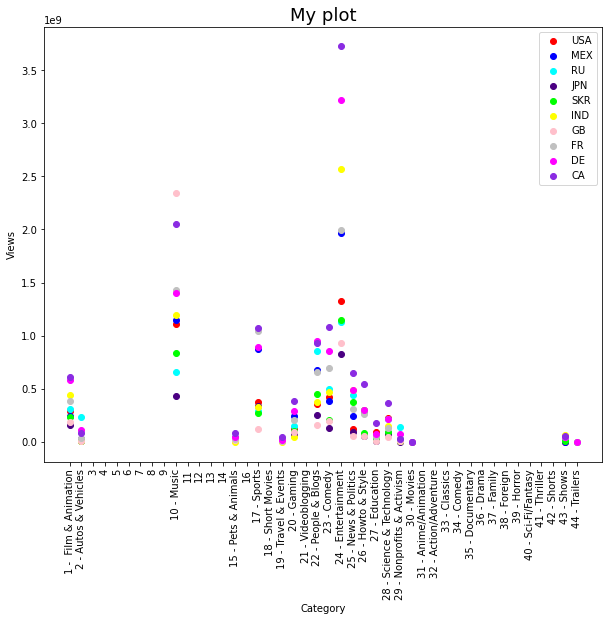

In [78]:
# First, let's visualize views pero category per country the first day of trend.

categories = ["1 -  Film & Animation","2 - Autos & Vehicles",3,4,5,6,7,8,9,"10 - Music",11,12,13,14,"15 - Pets & Animals",16,"17 - Sports","18 - Short Movies","19 - Travel & Events","20 - Gaming","21 - Videoblogging","22 - People & Blogs","23 - Comedy","24 - Entertainment","25 - News & Politics","26 - Howto & Style","27 - Education","28 - Science & Technology","29 - Nonprofits & Activism","30 - Movies","31 - Anime/Animation","32 - Action/Adventure","33 - Classics","34 - Comedy","35 - Documentary","36 - Drama","37 - Family","38 - Foreign","39 - Horror","40 - Sci-Fi/Fantasy","41 - Thriller","42 - Shorts","43 - Shows", "44 - Trailers"]
catnames=ca_cat_ids.values()

plt.figure(figsize = (10,8))

plt.subplot(1,1,1)
plt.title('My plot', fontsize=18)

plt.scatter(usa_views_cat.index, usa_views_cat.values, color='red', label='USA')
plt.scatter(mx_views_cat.index, mx_views_cat.values, color='blue', label='MEX')
plt.scatter(ru_views_cat.index, ru_views_cat.values, color='cyan', label='RU')
plt.scatter(jp_views_cat.index, jp_views_cat.values, color='indigo', label='JPN')
plt.scatter(kr_views_cat.index, kr_views_cat.values, color='lime', label='SKR')
plt.scatter(in_views_cat.index, in_views_cat.values, color='yellow', label='IND')
plt.scatter(gb_views_cat.index, gb_views_cat.values, color='pink', label='GB')
plt.scatter(fr_views_cat.index, fr_views_cat.values, color='silver', label='FR')
plt.scatter(de_views_cat.index, de_views_cat.values, color='magenta', label='DE')
plt.scatter(ca_views_cat.index, ca_views_cat.values, color='blueviolet', label='CA')
plt.ylabel('Views')
plt.xlabel('Category')
plt.xticks(ticks=np.arange(1,45),labels=categories, rotation = 90)
plt.legend()

<a name="lpcc"></a>
##### Likes per category and country (for the first day of trend)

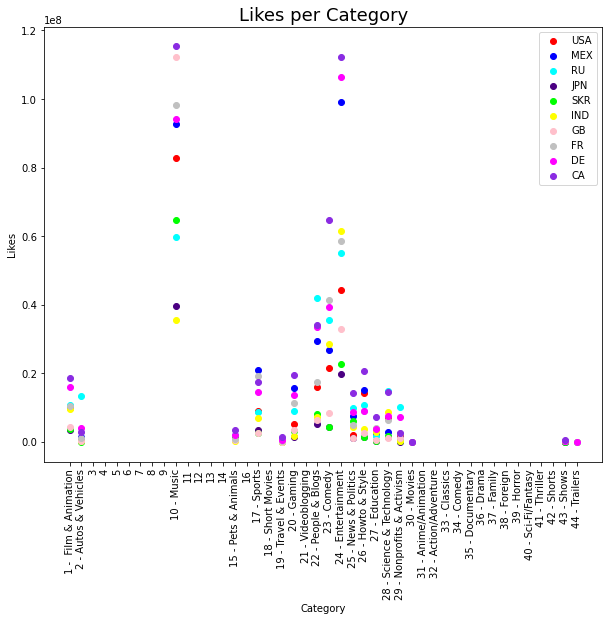

In [79]:
categories = ["1 -  Film & Animation","2 - Autos & Vehicles",3,4,5,6,7,8,9,"10 - Music",11,12,13,14,"15 - Pets & Animals",16,"17 - Sports","18 - Short Movies","19 - Travel & Events","20 - Gaming","21 - Videoblogging","22 - People & Blogs","23 - Comedy","24 - Entertainment","25 - News & Politics","26 - Howto & Style","27 - Education","28 - Science & Technology","29 - Nonprofits & Activism","30 - Movies","31 - Anime/Animation","32 - Action/Adventure","33 - Classics","34 - Comedy","35 - Documentary","36 - Drama","37 - Family","38 - Foreign","39 - Horror","40 - Sci-Fi/Fantasy","41 - Thriller","42 - Shorts","43 - Shows", "44 - Trailers"]

plt.figure(figsize = (10,8))

plt.subplot(1,1,1)
plt.title('Likes per Category', fontsize=18)

plt.scatter(usa_likes_cat.index, usa_likes_cat.values, color='red', label='USA')
plt.scatter(mx_likes_cat.index, mx_likes_cat.values, color='blue', label='MEX')
plt.scatter(ru_likes_cat.index, ru_likes_cat.values, color='cyan', label='RU')
plt.scatter(jp_likes_cat.index, jp_likes_cat.values, color='indigo', label='JPN')
plt.scatter(kr_likes_cat.index, kr_likes_cat.values, color='lime', label='SKR')
plt.scatter(in_likes_cat.index, in_likes_cat.values, color='yellow', label='IND')
plt.scatter(gb_likes_cat.index, gb_likes_cat.values, color='pink', label='GB')
plt.scatter(fr_likes_cat.index, fr_likes_cat.values, color='silver', label='FR')
plt.scatter(de_likes_cat.index, de_likes_cat.values, color='magenta', label='DE')
plt.scatter(ca_likes_cat.index, ca_likes_cat.values, color='blueviolet', label='CA')
plt.ylabel('Likes')
plt.xlabel('Category')
plt.xticks(ticks=np.arange(1,45),labels=categories, rotation = 90)
plt.legend()

<a name="cpcc"></a>
##### Comments per category and country

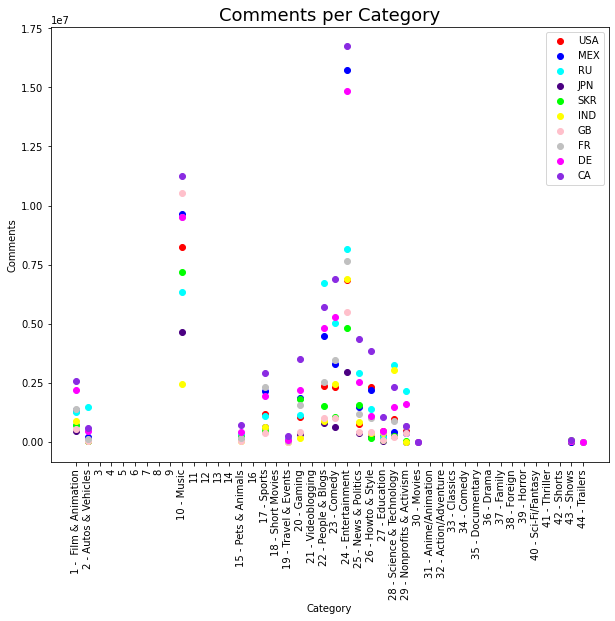

In [80]:
categories = ["1 -  Film & Animation","2 - Autos & Vehicles",3,4,5,6,7,8,9,"10 - Music",11,12,13,14,"15 - Pets & Animals",16,"17 - Sports","18 - Short Movies","19 - Travel & Events","20 - Gaming","21 - Videoblogging","22 - People & Blogs","23 - Comedy","24 - Entertainment","25 - News & Politics","26 - Howto & Style","27 - Education","28 - Science & Technology","29 - Nonprofits & Activism","30 - Movies","31 - Anime/Animation","32 - Action/Adventure","33 - Classics","34 - Comedy","35 - Documentary","36 - Drama","37 - Family","38 - Foreign","39 - Horror","40 - Sci-Fi/Fantasy","41 - Thriller","42 - Shorts","43 - Shows", "44 - Trailers"]

plt.figure(figsize = (10,8))

plt.subplot(1,1,1)
plt.title('Comments per Category', fontsize=18)

plt.scatter(usa_comments_cat.index, usa_comments_cat.values, color='red', label='USA')
plt.scatter(mx_comments_cat.index, mx_comments_cat.values, color='blue', label='MEX')
plt.scatter(ru_comments_cat.index, ru_comments_cat.values, color='cyan', label='RU')
plt.scatter(jp_comments_cat.index, jp_comments_cat.values, color='indigo', label='JPN')
plt.scatter(kr_comments_cat.index, kr_comments_cat.values, color='lime', label='SKR')
plt.scatter(in_comments_cat.index, in_comments_cat.values, color='yellow', label='IND')
plt.scatter(gb_comments_cat.index, gb_comments_cat.values, color='pink', label='GB')
plt.scatter(fr_comments_cat.index, fr_comments_cat.values, color='silver', label='FR')
plt.scatter(de_comments_cat.index, de_comments_cat.values, color='magenta', label='DE')
plt.scatter(ca_comments_cat.index, ca_comments_cat.values, color='blueviolet', label='CA')
plt.ylabel('Comments')
plt.xlabel('Category')
plt.xticks(ticks=np.arange(1,45),labels=categories, rotation = 90)
plt.legend()

<a name="acpcc"></a>

#### Average of comments per category and country

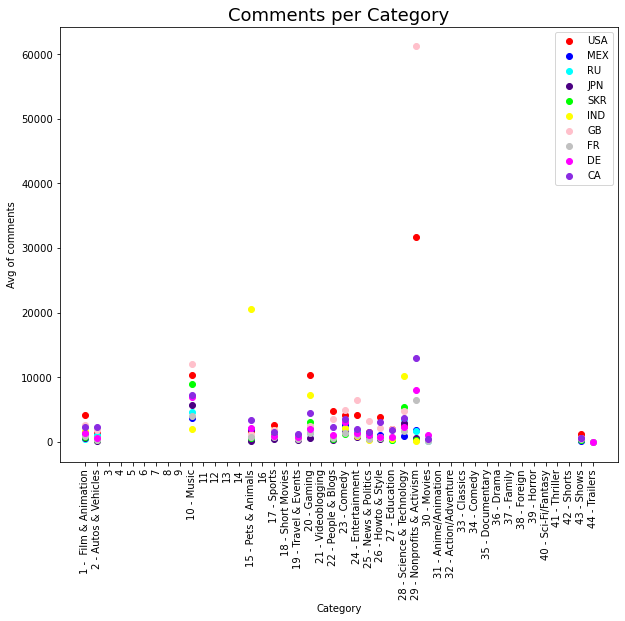

In [81]:
categories = ["1 -  Film & Animation","2 - Autos & Vehicles",3,4,5,6,7,8,9,"10 - Music",11,12,13,14,"15 - Pets & Animals",16,"17 - Sports","18 - Short Movies","19 - Travel & Events","20 - Gaming","21 - Videoblogging","22 - People & Blogs","23 - Comedy","24 - Entertainment","25 - News & Politics","26 - Howto & Style","27 - Education","28 - Science & Technology","29 - Nonprofits & Activism","30 - Movies","31 - Anime/Animation","32 - Action/Adventure","33 - Classics","34 - Comedy","35 - Documentary","36 - Drama","37 - Family","38 - Foreign","39 - Horror","40 - Sci-Fi/Fantasy","41 - Thriller","42 - Shorts","43 - Shows", "44 - Trailers"]

plt.figure(figsize = (10,8))

plt.subplot(1,1,1)
plt.title('Comments per Category', fontsize=18)

plt.scatter(usa_com_m.index, usa_com_m.values, color='red', label='USA')
plt.scatter(mx_com_m.index, mx_com_m.values, color='blue', label='MEX')
plt.scatter(ru_com_m.index, ru_com_m.values, color='cyan', label='RU')
plt.scatter(jp_com_m.index, jp_com_m.values, color='indigo', label='JPN')
plt.scatter(kr_com_m.index, kr_com_m.values, color='lime', label='SKR')
plt.scatter(in_com_m.index, in_com_m.values, color='yellow', label='IND')
plt.scatter(gb_com_m.index, gb_com_m.values, color='pink', label='GB')
plt.scatter(fr_com_m.index, fr_com_m.values, color='silver', label='FR')
plt.scatter(de_com_m.index, de_com_m.values, color='magenta', label='DE')
plt.scatter(ca_com_m.index, ca_com_m.values, color='blueviolet', label='CA')
plt.ylabel('Avg of comments')
plt.xlabel('Category')
plt.xticks(ticks=np.arange(1,45),labels=categories, rotation = 90)
plt.legend()

<a name="mdpt"></a>
#### Median of days from publish til trend.

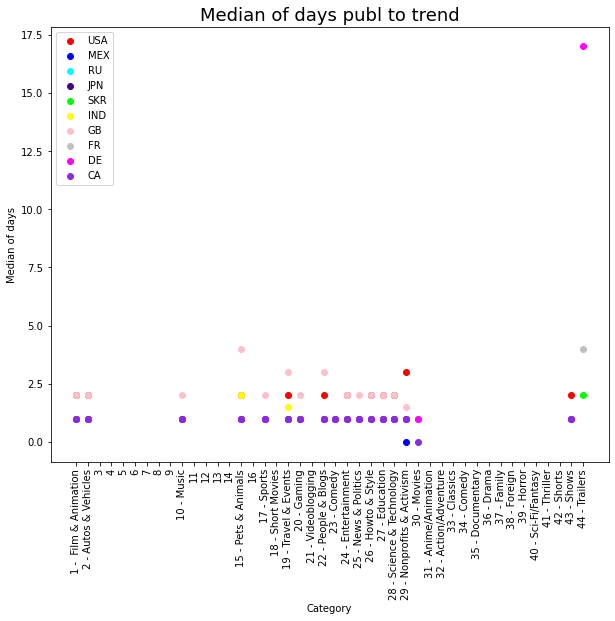

In [87]:
plt.figure(figsize = (10,8))

plt.subplot(1,1,1)
plt.title('Median of days publ to trend', fontsize=18)

plt.scatter(usa_mdn_days.index, usa_mdn_days.values, color='red', label='USA')
plt.scatter(mx_mdn_days.index, mx_mdn_days.values, color='blue', label='MEX')
plt.scatter(ru_mdn_days.index, ru_mdn_days.values, color='cyan', label='RU')
plt.scatter(jp_mdn_days.index, jp_mdn_days.values, color='indigo', label='JPN')
plt.scatter(kr_mdn_days.index, kr_mdn_days.values, color='lime', label='SKR')
plt.scatter(in_mdn_days.index, in_mdn_days.values, color='yellow', label='IND')
plt.scatter(gb_mdn_days.index, gb_mdn_days.values, color='pink', label='GB')
plt.scatter(fr_mdn_days.index, fr_mdn_days.values, color='silver', label='FR')
plt.scatter(de_mdn_days.index, de_mdn_days.values, color='magenta', label='DE')
plt.scatter(ca_mdn_days.index, ca_mdn_days.values, color='blueviolet', label='CA')
plt.ylabel('Median of days')
plt.xlabel('Category')
plt.xticks(ticks=np.arange(1,45),labels=categories, rotation = 90)
plt.legend()

# THis table shows that mostly, the trending videos took less than 4 days to be trend. 
# Very few videos were firstly trend on the same day of publication, and most of them took 1 or 2 days.

<a name="mtx"></a>

#### Correlation matrix. Correlation between views, likes, dislikes and nr of comments.

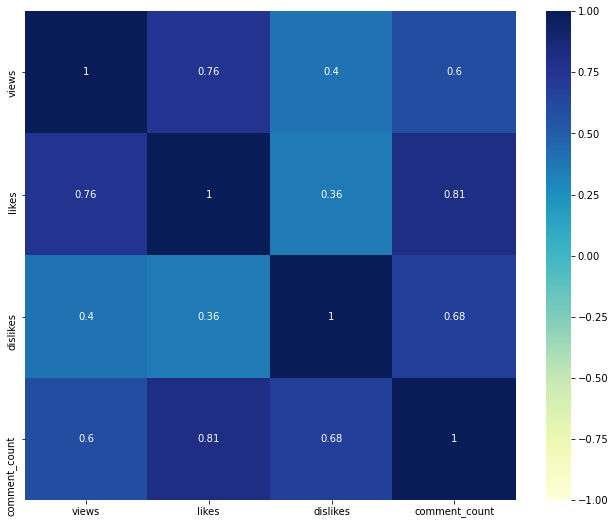

In [83]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

df_matrix = usa_videos1[['views', 'likes', 'dislikes','comment_count']].copy()
df_matrix2 = usa_videos1[['likes', 'dislikes']].copy()

f, ax = plt.subplots(figsize=(11, 9))
heatmap = sns.heatmap(df_matrix.corr(),vmin=-1,vmax=1, annot=True,cmap='YlGnBu')

In [90]:
ratio_likes_dis = usa_videos1["likes"] / (usa_videos1["likes"] + usa_videos1["dislikes"])
ratio_likes_dis
# Add it to a new column
usa_videos1["ratio_likes_dis"] = ratio_likes_dis

In [91]:
usa_videos1["ratio_likes_dis"]

0        0.950970
1        0.940521
2        0.964729
3        0.938550
4        0.985181
           ...   
40760    0.966927
40761    0.960105
40762    0.979230
40764    0.953487
40766    0.965211
Name: ratio_likes_dis, Length: 6351, dtype: float64

In [96]:
usa_videos1["days_datediff"].value_counts()

1       2739
2       1812
3        688
4        364
5        237
        ... 
538        1
2823       1
2839       1
862        1
1983       1
Name: days_datediff, Length: 123, dtype: int64